In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
container_event_column_name = ['container_id', 'machine_id', 'time_stamp', 'app_du', 'status',
                               'cpu_request', 'cpu_limit', 'mem_size']
container_usage_column_name = ['container_id', 'machine_id', 'time_stamp', 'cpu_util_percent', 'mem_util_percent', 'cpi', 'mem_gps',
                               'mpki', 'net_in', 'net_out', 'disk_io_percent ']


In [3]:
file =   open('data\container_usage.csv', 'r', encoding='utf-8')
data = pd.read_csv(file)
df = pd.DataFrame(data)
df

,Unnamed: 0,m_108,696330,20,56,Unnamed: 5,Unnamed: 6,Unnamed: 7,0,0.1,2
0,NaN,m_108,698570,14,64,1.56,0.00,0.0,0.0,0.00,4.0
1,NaN,m_108,698620,12,64,1.46,0.03,0.0,0.0,0.00,4.0
2,NaN,m_108,698670,10,64,1.74,0.00,0.0,0.0,0.00,5.0
3,NaN,m_108,699740,7,65,1.57,0.02,0.0,0.0,0.00,6.0
4,NaN,m_108,700010,8,64,1.90,0.00,0.0,0.0,0.00,4.0
...,...,...,...,...,...,...,...,...,...,...,...
99996,c_10097,m_1596,731090,4,100,1.19,0.00,0.0,0.1,0.12,14.0
99997,c_10097,m_1596,731210,5,99,1.37,0.00,1.0,0.1,0.12,11.0
99998,c_10097,m_1596,731580,5,99,1.50,0.00,1.0,0.1,0.12,15.0
99999,c_10097,m_1596,731960,4,99,1.65,0.00,1.0,0.1,0.12,19.0


In [4]:
df.columns = container_usage_column_name
grp = df[['time_stamp', 'container_id', 'cpu_util_percent']].groupby('time_stamp')
mean_grp = grp.mean()
max_grp = grp.max()
min_grp = grp.min()
mean_cpu_usage_by_timestamp = mean_grp['cpu_util_percent']
max_cpu_usage_by_timestamp = max_grp['cpu_util_percent']
min_cpu_usage_by_timestamp = min_grp['cpu_util_percent']


In [6]:
print("Minimum CPU usage based on time stamp", min_cpu_usage_by_timestamp)

print("Mean CPU usage")


Minimum CPU usage based on time stamp time_stamp
86410     4
86420     0
86440     1
86480     0
86490     2
         ..
777530    7
777540    3
777550    7
777570    4
777590    9
Name: cpu_util_percent, Length: 51856, dtype: int64


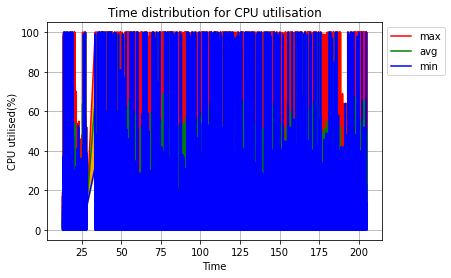

In [10]:
index = (max_grp.index - 39600) / 3600
plt.plot(index, max_cpu_usage_by_timestamp, 'r', label='max')
plt.plot(index, mean_cpu_usage_by_timestamp, 'green', label='avg')
plt.plot(index, min_cpu_usage_by_timestamp, 'b', label='min')

plt.fill_between(index, max_cpu_usage_by_timestamp, min_cpu_usage_by_timestamp, color='orange')

plt.legend(bbox_to_anchor=[1, 1])
plt.title('Time distribution for CPU utilisation')
plt.xlabel('Time')
plt.ylabel('CPU utilised(%)')
plt.grid()
plt.show()
